# Importing libraries

In [88]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Importing selected models

In [458]:
fullname = "selected_models/06.02.2021_21.34/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [459]:
models.all_memberships

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.,

In [460]:
models.all_labels

{0: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 

In [461]:
models.folds

{'x train 0': array([[ 4.014912  ,  2.0261257 , -4.192399  , ..., -0.79175526,
         -1.6366007 , -0.84516424],
        [ 5.0867157 ,  3.2544663 , -4.3758097 , ...,  0.45218378,
         -1.0958344 , -2.558822  ],
        [ 3.4330046 ,  1.4652389 , -4.4064946 , ..., -0.38927388,
         -1.9812948 , -1.5923504 ],
        ...,
        [ 5.0545683 ,  3.3746178 , -4.452071  , ..., -0.7996819 ,
         -1.7689104 , -2.6761549 ],
        [ 4.2167726 ,  3.1746116 , -5.0935287 , ..., -0.32667318,
         -1.7428653 , -2.184502  ],
        [ 4.119267  ,  3.056037  , -3.6739433 , ..., -1.6432753 ,
         -2.1998851 , -2.025814  ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [462]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [463]:
memberships[0:10]

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [464]:
predictions = [(index, 1) if x.values >= 0.5 else (index, 0) for index, x in memberships.iterrows()]

In [465]:
predictions[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

In [466]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [467]:
labels[0:10]

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [468]:
len(predictions), len(labels), len(memberships)

(500, 500, 500)

# Frequencies

In [469]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

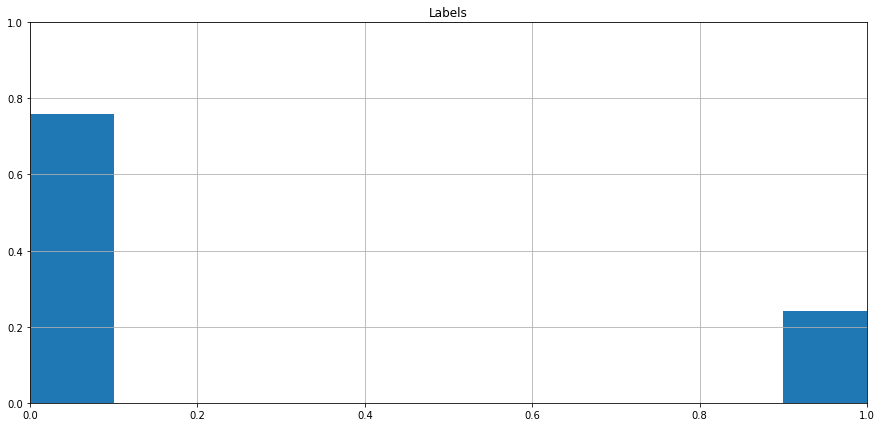

In [470]:
plot_hist(labels)

plt.title("Labels")
plt.show()

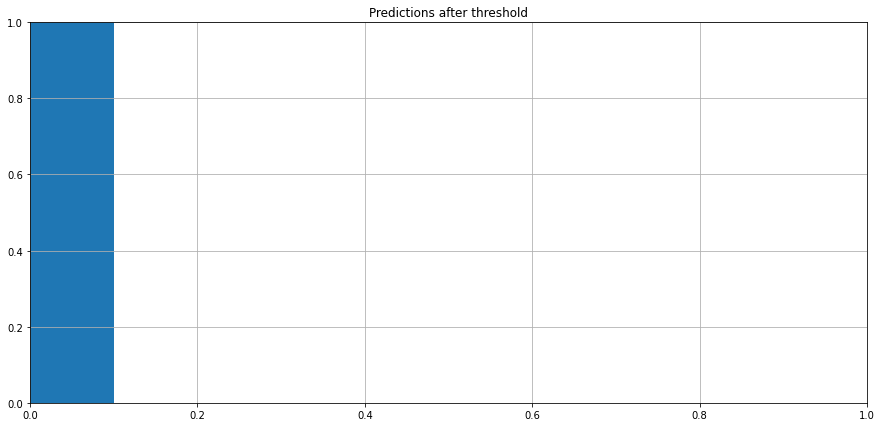

In [471]:
plot_hist([i[1] for i in predictions])

plt.title("Predictions after threshold")
plt.show()

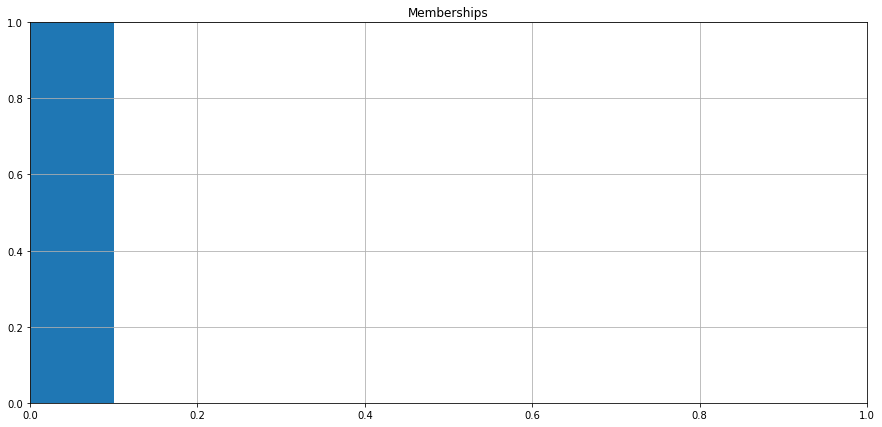

In [472]:
plot_hist(memberships)

plt.title("Memberships")
plt.show()

In [473]:
memberships

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


In [474]:
def select_radius(radius, threshold):
    special_range = [(index, x[0]) for index, x in memberships.iterrows() if x.values <= threshold + radius and x.values >= threshold - radius]
    return special_range

In [475]:
interval = select_radius(0.15, 0.5)
interval_ids = [index[0] for index in interval]
interval[:10]

[]

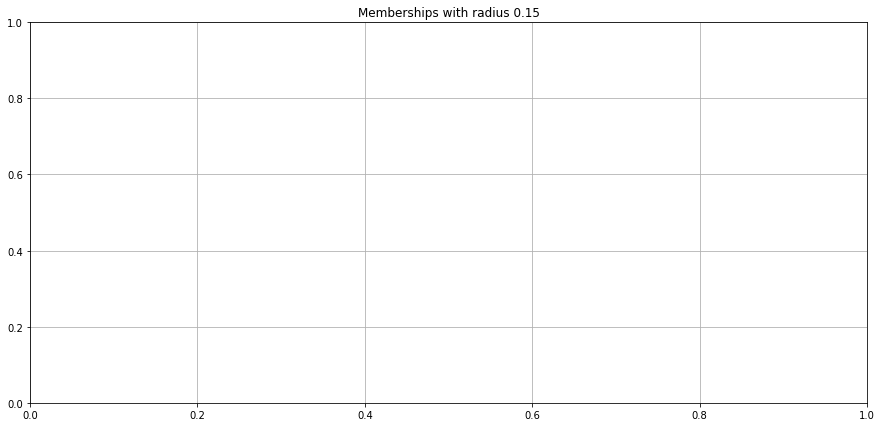

In [476]:
radius = 0.15
plot_hist([x[1] for x in interval])

plt.title("Memberships with radius " + str(radius))
plt.show()

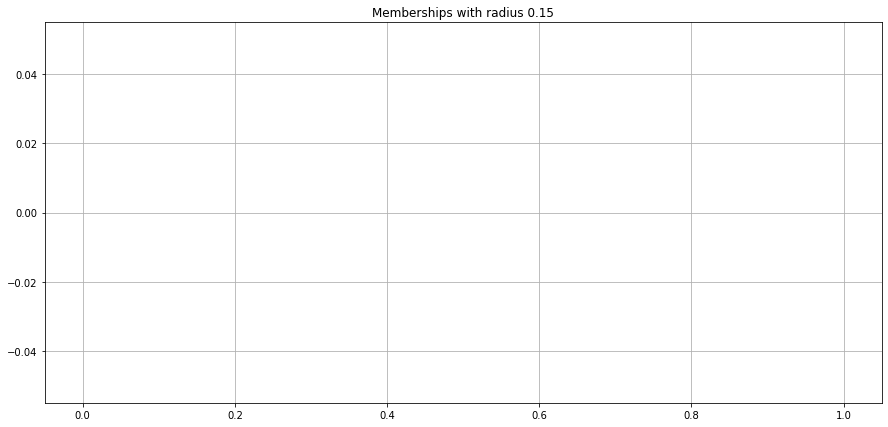

In [477]:
plt.figure(figsize=(15, 7))
plt.hist([x[1] for x in interval])
plt.grid()
plt.title("Memberships with radius " + str(radius))
plt.show()

In [478]:
radius = 0.15
select_radius(radius, 0.5)[:10]

[]

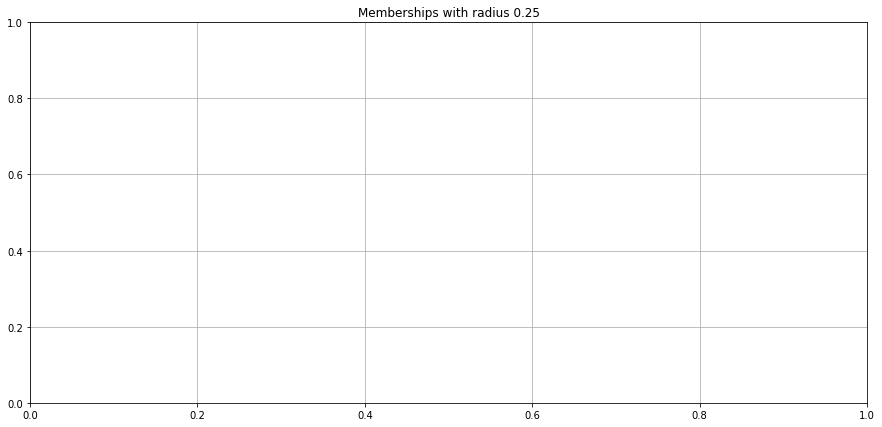

In [479]:
radius = 0.25
plot_hist([x[1] for x in interval])

plt.title("Memberships with radius " + str(radius))
plt.show()

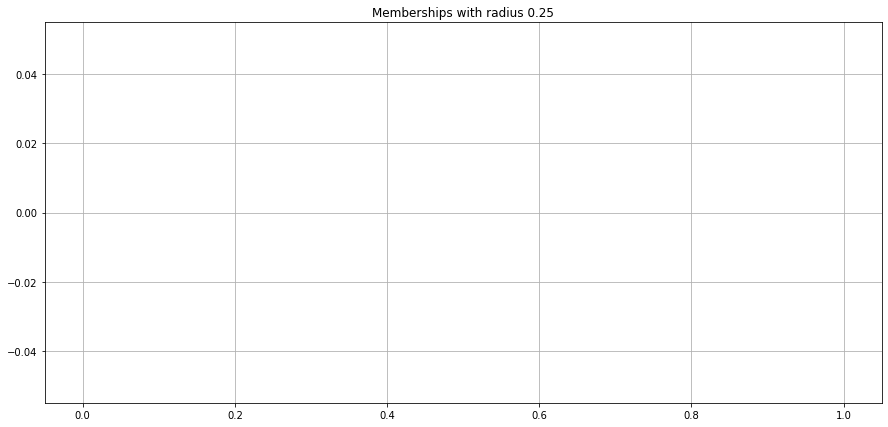

In [480]:
plt.figure(figsize=(15, 7))
plt.hist([x[1] for x in interval])
plt.grid()
plt.title("Memberships with radius " + str(radius))
plt.show()

# Classes of error (TP, FP, TN, FN)

In [481]:
data = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(labels[0], [x[1] for x in predictions], memberships[0]):
    if pred == 1:
        if lab == pred:
            data = data.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            data = data.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	

In [482]:
data[data["Outcome"] == "TP"].head(10)

,Outcome,Label,Prediction,Membership


In [483]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership


In [484]:
data[data["Outcome"] == "TN"].head(10)

,Outcome,Label,Prediction,Membership
0,TN,0,0,0.0
1,TN,0,0,0.0
2,TN,0,0,0.0
3,TN,0,0,0.0
4,TN,0,0,0.0
6,TN,0,0,0.0
7,TN,0,0,0.0
8,TN,0,0,0.0
9,TN,0,0,0.0
10,TN,0,0,0.0


In [485]:
data[data["Outcome"] == "FN"].head(10)

,Outcome,Label,Prediction,Membership
5,FN,1,0,0.0
14,FN,1,0,0.0
15,FN,1,0,0.0
20,FN,1,0,0.0
33,FN,1,0,0.0
37,FN,1,0,0.0
39,FN,1,0,0.0
43,FN,1,0,0.0
47,FN,1,0,0.0
48,FN,1,0,0.0


In [486]:
tp = data[data["Outcome"] == "TP"]["Membership"]
fp = data[data["Outcome"] == "FP"]["Membership"]
tn = data[data["Outcome"] == "TN"]["Membership"]
fn = data[data["Outcome"] == "FN"]["Membership"]

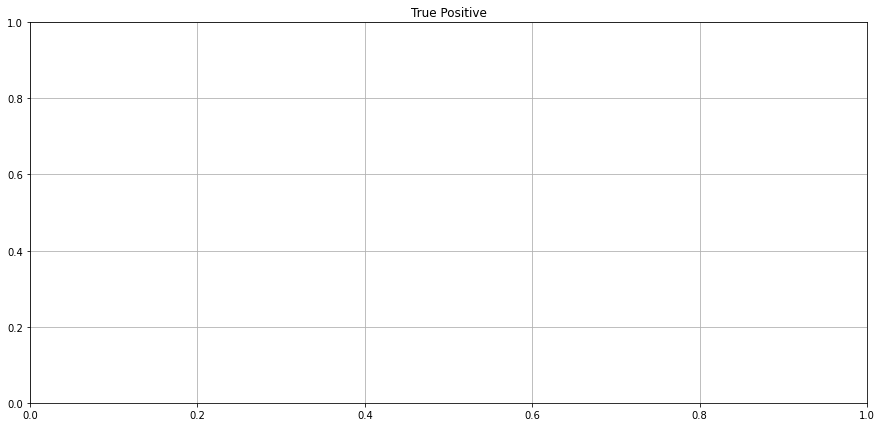

In [487]:
plot_hist(tp)

plt.title("True Positive")
plt.show()

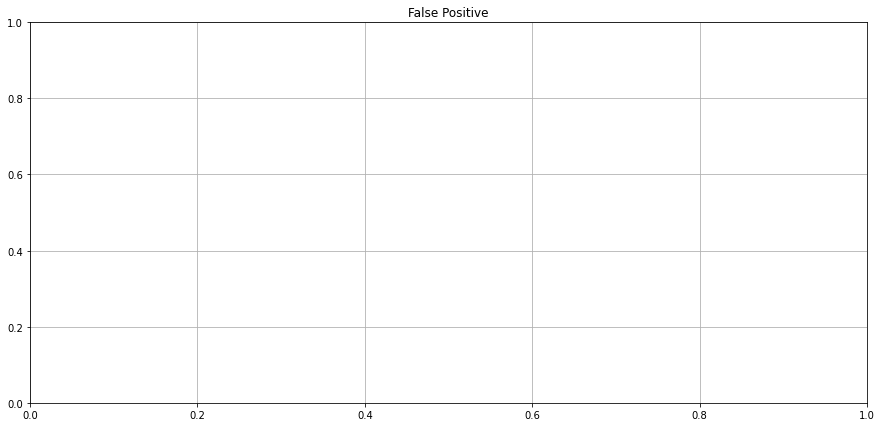

In [488]:
plot_hist(fp)

plt.title("False Positive")
plt.show()

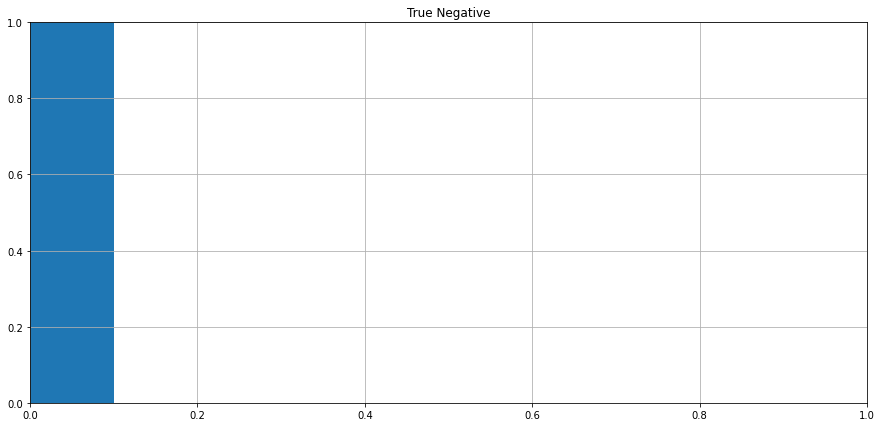

In [489]:
plot_hist(tn)

plt.title("True Negative")
plt.show()

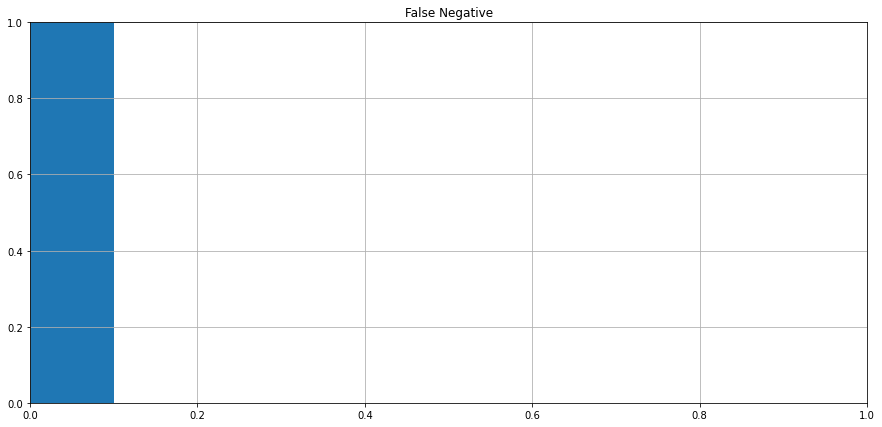

In [490]:
plot_hist(fn)

plt.title("False Negative")
plt.show()

Over 500 news

In [491]:
confusion = pd.DataFrame(confusion_matrix(labels[0], [x[1] for x in predictions]), 
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
confusion

,Actually fake,Actually not fake
Classified fake,380,0
Classified not fake,120,0


In [492]:
print("TP: ", len(tp))
print("FP: ", len(fp))
print("TN: ", len(tn))
print("FN: ", len(fn))

TP:  0
FP:  0
TN:  380
FN:  120


In [493]:
len(tp)+len(fp)+len(tn)+len(fn)

500

In [494]:
len(tp) + len(tn), len(fp) + len(fn)

(380, 120)

In [495]:
tp_string = data[data["Outcome"] == "TP"]["Outcome"].values
fp_string = data[data["Outcome"] == "FP"]["Outcome"].values
tn_string = data[data["Outcome"] == "TN"]["Outcome"].values
fn_string = data[data["Outcome"] == "FN"]["Outcome"].values

In [496]:
all_cases = []

for i in tp_string:
    all_cases.append(i)
    
for i in fp_string:
    all_cases.append(i)
    
for i in tn_string:
    all_cases.append(i)
    
for i in fn_string:
    all_cases.append(i)

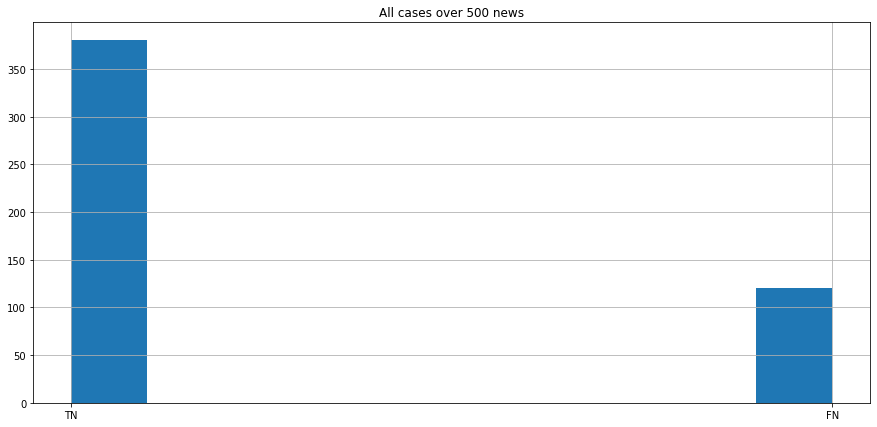

In [497]:
plt.figure(figsize=(15, 7))
plt.hist(all_cases)
plt.grid()
plt.title("All cases over 500 news")
plt.show()

In [498]:
tp.describe(), fp.describe(), tn.describe(), fn.describe()

(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Membership, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Membership, dtype: float64,
 count    380.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: Membership, dtype: float64,
 count    120.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: Membership, dtype: float64)

In [499]:
accuracy_score(labels[0], [x[1] for x in predictions])

0.76

In [500]:
(len(tp) + len(tn)) / 500

0.76

# Baseline

In [501]:
def my_confusion_matrix(labels, predicted_labels):
    '''
    true positive: predicted_labels = labels = 1
    false positive: predicted_labels = 1 != labels = 0
    true negative: predicted_labels = labels = 0
    false negative: predicted_labels = 0 != labels = 1
    '''

    TP = 0
    FP = 0
    FN = 0
    TN = 0
    
    for label, predicted_label in zip(labels, predicted_labels):
        if predicted_label == 1: # positive
            if predicted_label == label: # true positive
                TP = TP + 1
            else: # false positive
                FP = FP + 1
        else: # negative
            if predicted_label == label: # true negative
                TN = TN + 1
            else: # false negative
                FN = FN + 1
            
    return TP, FP, FN, TN

def precision(TP, FP):
    ''' true positive / (true positive + false positive)'''
    if TP + FP == 0.0:
        return 0.0
    else:
        return TP / (TP + FP)

def recall(TP, FN):
    ''' true positive / (true positive + false negative) '''
    if TP + FN == 0.0:
        return 0.0
    else:
        return TP / (TP + FN)

def f_one(precision, recall):
    ''' 2 * [(precision * recall) / (precision + recall)] '''
    if precision + recall == 0.0:
        return 0.0
    else:
        return 2 * ((precision * recall) / (precision + recall))

In [502]:
tree = DecisionTreeClassifier()
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
SVM = svm.LinearSVC()

tree_pred = []
NN_pred = []
SVM_pred = []

tree_scores = []
NN_scores = []
SVM_scores = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    tree.fit(X_train, y_train)
    NN.fit(X_train, y_train)
    SVM.fit(X_train, y_train)
    
    tree_pred.append(tree.predict(X_test))
    NN_pred.append(NN.predict(X_test))
    SVM_pred.append(SVM.predict(X_test))
    
    tree_scores.append(tree.score(X_test, y_test))
    NN_scores.append(NN.score(X_test, y_test))
    SVM_scores.append(SVM.score(X_test, y_test))
    
print("Tree classifier: ", np.mean(tree_scores))
print("Neural network: ", np.mean(NN_scores))
print("Support vector machine: ", np.mean(SVM_scores))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tree classifier:  0.648
Neural network:  0.76
Support vector machine:  0.7


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [503]:
all_tree_predictions = []

for i in tree_pred:
    for j in i:
        all_tree_predictions.append(j)
        
all_NN_predictions = []

for i in NN_pred:
    for j in i:
        all_NN_predictions.append(j)
        
all_SVM_predictions = []

for i in SVM_pred:
    for j in i:
        all_SVM_predictions.append(j)

In [504]:
TP, FP, FN, TN = my_confusion_matrix(labels[0], all_tree_predictions)
confusion_tree = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_tree = precision(TP, FP)
recall_tree = recall(TP, FN)
f1_tree = f_one(precision_tree, recall_tree)

TP, FP, FN, TN = my_confusion_matrix(labels[0], all_NN_predictions)
confusion_NN = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_NN = precision(TP, FP)
recall_NN = recall(TP, FN)
f1_NN = f_one(precision_NN, recall_NN)

TP, FP, FN, TN = my_confusion_matrix(labels[0], all_SVM_predictions)
confusion_SVM = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_SVM = precision(TP, FP)
recall_SVM = recall(TP, FN)
f1_SVM = f_one(precision_SVM, recall_SVM)

In [505]:
confusion_tree

,Actually fake,Actually not fake
Classified fake,39,95
Classified not fake,81,285


In [506]:
confusion_NN

,Actually fake,Actually not fake
Classified fake,0,0
Classified not fake,120,380


In [507]:
confusion_SVM

,Actually fake,Actually not fake
Classified fake,17,47
Classified not fake,103,333


In [508]:
pd.DataFrame([[precision_tree, recall_tree, f1_tree],
              [precision_NN, recall_NN, f1_NN], 
              [precision_SVM, recall_SVM, f1_SVM]],
              index=["tree classifier", "neural network", "svm"], 
              columns=["precision", "recall", "f1"])

,precision,recall,f1
tree classifier,0.291045,0.325000,0.307087
neural network,0.000000,0.000000,0.000000
svm,0.265625,0.141667,0.184783


Here you can do a comparison with models by computing on average precision, recall and f1

# Learning Curve

In [509]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.001, 0.01, 10)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

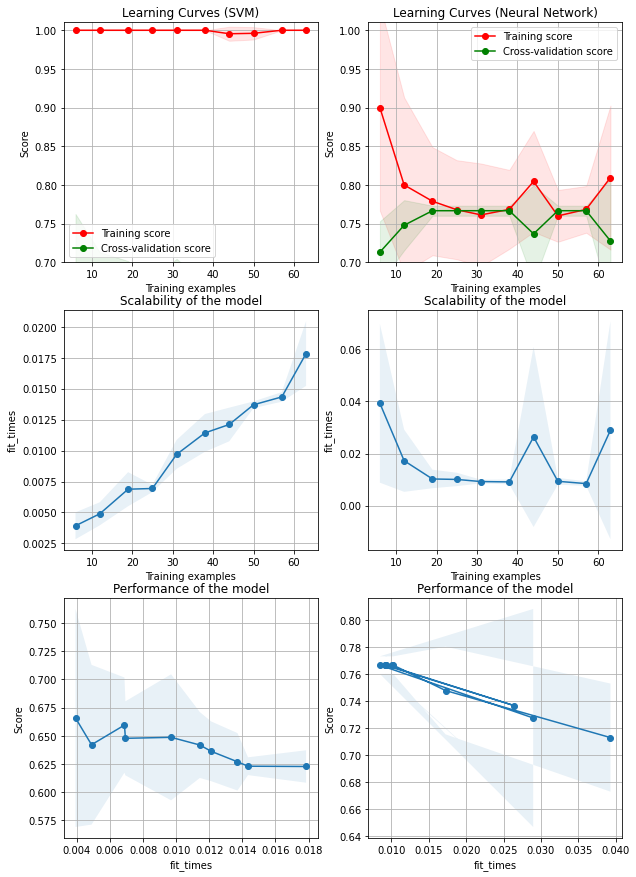

In [510]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

PATH_TEXTS = "preprocessed_datasets/text/06.02.2021_21.00/final_text_dataset_7926.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

def simple_split(dataset):
    X = dataset.iloc[:, 1].values  # x-component
    y = dataset.iloc[:, 2].values  # labels
    return X, y

X, y = simple_split(dataset)
X = [ast.literal_eval(i) for i in X]  # this is needed to parse strings
X = np.array(X)

#title = "Learning Curves (Tree Classifier)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = DecisionTreeClassifier()
#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm.LinearSVC()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Retrieve news texts

In [511]:
fullname = "preprocessed_datasets/text/06.02.2021_21.00/dataset_fake.pickle"
file = open(fullname, "rb")
dataset_fake = pickle.load(file)

fullname = "preprocessed_datasets/text/06.02.2021_21.00/dataset_true.pickle"
file = open(fullname, "rb")
dataset_true = pickle.load(file)

In [512]:
folds = models.folds 
vectors = []
vectors_labels = []

for i in range(0, 5):
    for x, label in zip(folds['x test ' + str(i)], folds['y test ' + str(i)]):
        vectors.append(x)
        vectors_labels.append(label)

In [513]:
sample = pd.DataFrame(vectors)
sample.insert(0, 'label', pd.Series(vectors_labels))
sample

,label,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,0,2.838177,2.161265,-4.295609,-2.050986,-0.359575,0.251383,-0.437301,-0.475514,1.222530,...,-1.065435,1.300702,-2.016820,-0.943670,-2.213688,-1.947172,1.565527,-1.509673,-1.895585,-1.609900
1,0,3.476033,1.713293,-5.187519,-1.646218,-1.050963,1.301940,-0.379983,-1.586931,1.905065,...,-3.469457,0.791135,-1.424525,-1.051719,-2.673661,-1.479506,1.526767,-0.500571,-0.489055,-1.542755
2,0,4.019837,2.525969,-4.627111,-1.894266,-0.815918,0.659413,-0.999317,-0.244538,1.679674,...,1.100647,1.542013,-2.083758,-1.805543,-3.361310,-2.466932,2.573271,-0.327987,-0.309888,-1.927905
3,0,3.182411,1.612608,-5.454437,-0.970311,-0.143030,0.618373,-0.938300,-1.588250,2.479841,...,-2.165766,1.525870,-2.709574,-1.573586,-1.616158,-2.068229,0.857073,-1.514698,-0.847004,-1.014583
4,0,2.801558,1.047769,-4.213898,-1.041920,0.057309,0.492733,-1.275173,-1.163830,0.929965,...,0.253834,-0.175657,-2.288065,-0.363895,-2.704622,-3.035097,3.392345,0.014499,-1.402232,-0.623973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,2.951402,1.570637,-4.341742,0.194535,0.034229,0.425184,-1.502572,-2.882464,0.862991,...,-2.903827,-1.475853,-0.286454,-0.675339,-2.304076,-2.264226,2.499698,-1.405622,-1.051883,-0.592143
496,0,4.396272,2.156391,-5.220315,-1.482849,-0.548280,0.210076,-0.353983,-1.240121,2.051674,...,-1.240061,2.041746,-2.850669,-0.835194,-2.797772,-2.441526,1.008144,-0.812976,-0.851529,-1.867309
497,0,5.054568,3.374618,-4.452071,-2.250363,-0.935921,0.461672,-0.043604,-1.236225,1.449689,...,-0.995538,3.114815,-1.519683,-0.783855,-1.566298,-1.448702,0.284404,-0.799682,-1.768910,-2.676155
498,1,4.216773,3.174612,-5.093529,-2.978533,-0.234530,0.565240,-0.145474,-0.890021,0.847455,...,-1.193763,3.234140,-1.607710,-0.417481,-1.694281,-1.466824,1.068625,-0.326673,-1.742865,-2.184502


In [514]:
sample.iloc[[i for i in interval_ids]]

,label,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95


## Indecision cases

In [515]:
# this code is necessary in order to transform ids in (0, 499) to the original ones in (0, 38591)
# and then do the research in the preprocessed dataset with ids
# the alternative method was to do the research directly in the dataset 
# with vectors but this has much more computational cost

interval_sample = sample.iloc[[i for i in interval_ids]]
lookup = models.lookup
interval_original_ids = []
interval_original_labels = []

for index, x in interval_sample.loc[:, interval_sample.columns != 'label'].iterrows():
    lookup_id = lookup[str(x.values)]['id']
    lookup_label = lookup[str(x.values)]['label']
    interval_original_ids.append(lookup_id) # original ids of news extracted in this interval
    interval_original_labels.append(lookup_label) # original labels of news extracted in this interval

In [516]:
final_ids = []

for i in interval_original_ids:
    if i in dataset["index"]:
        final_id = dataset.index[dataset["index"] == i][0]
        final_ids.append(final_id)

In [517]:
data_interval = dataset.loc[[i for i in final_ids]]
data_interval

,index,text,label


In [518]:
data_interval["text"] = data_interval["text"].apply(lambda s : ast.literal_eval(s))

In [519]:
ground_truth_interval = data_interval["label"]

In [520]:
ground_truth_interval[:10]

Series([], Name: label, dtype: int64)

In [521]:
TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [1 if x >= 0.4 else 0 for index, x in interval])
confusion_interval = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
confusion_interval

,Actually fake,Actually not fake
Classified fake,0,0
Classified not fake,0,0


We confirmed the consistence of our data, now we can safely use the vector and go on with the baseline

In [522]:
tree_predictions = []
NN_predictions = []
SVM_predictions = []

for test_data in data_interval["text"]:
    test_data = np.array(test_data).reshape(1, -1)
    tree_predictions.append(tree.predict(test_data))
    NN_predictions.append(NN.predict(test_data))
    SVM_predictions.append(SVM.predict(test_data))

In [523]:
[x[0] for x in tree_predictions][:10], [x[0] for x in NN_predictions][:10], [x[0] for x in SVM_predictions][:10]

([], [], [])

In [524]:
TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in tree_predictions])
confusion_tree = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_tree = precision(TP, FP)
recall_tree = recall(TP, FN)
f1_tree = f_one(precision_tree, recall_tree)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in NN_predictions])
confusion_NN = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_NN = precision(TP, FP)
recall_NN = recall(TP, FN)
f1_NN = f_one(precision_NN, recall_NN)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in SVM_predictions])
confusion_SVM = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_SVM = precision(TP, FP)
recall_SVM = recall(TP, FN)
f1_SVM = f_one(precision_SVM, recall_SVM)

In [525]:
confusion_tree

,Actually fake,Actually not fake
Classified fake,0,0
Classified not fake,0,0


In [526]:
confusion_NN

,Actually fake,Actually not fake
Classified fake,0,0
Classified not fake,0,0


In [527]:
confusion_SVM

,Actually fake,Actually not fake
Classified fake,0,0
Classified not fake,0,0


In [528]:
pd.DataFrame([[precision_tree, recall_tree, f1_tree],
              [precision_NN, recall_NN, f1_NN], 
              [precision_SVM, recall_SVM, f1_SVM]],
              index=["tree classifier", "neural network", "svm"], 
              columns=["precision", "recall", "f1"])

,precision,recall,f1
tree classifier,0.0,0.0,0.0
neural network,0.0,0.0,0.0
svm,0.0,0.0,0.0


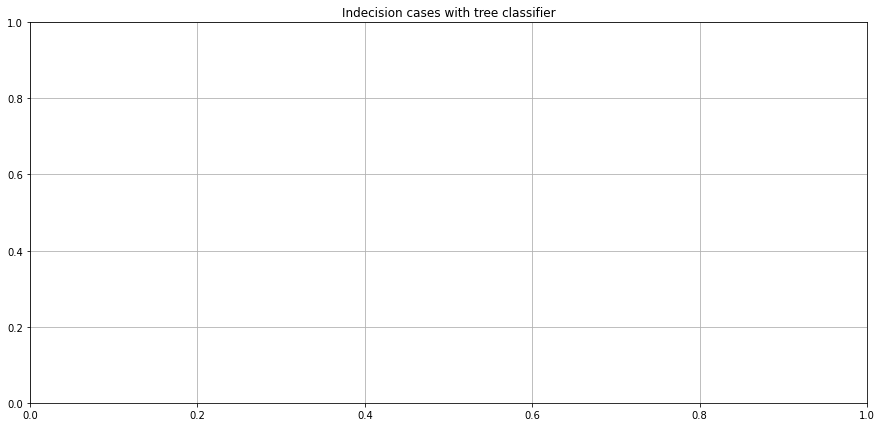

In [529]:
plot_hist([x[0] for x in tree_predictions])
plt.title("Indecision cases with tree classifier")
plt.show()

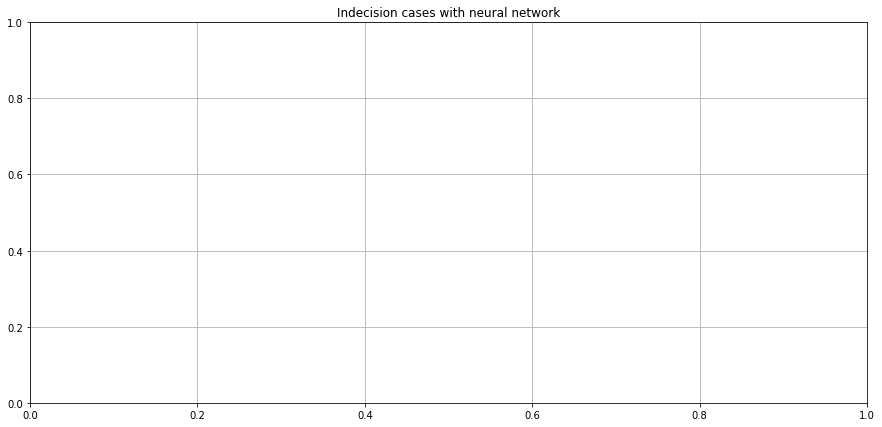

In [530]:
plot_hist([x[0] for x in NN_predictions])

plt.title("Indecision cases with neural network")
plt.show()

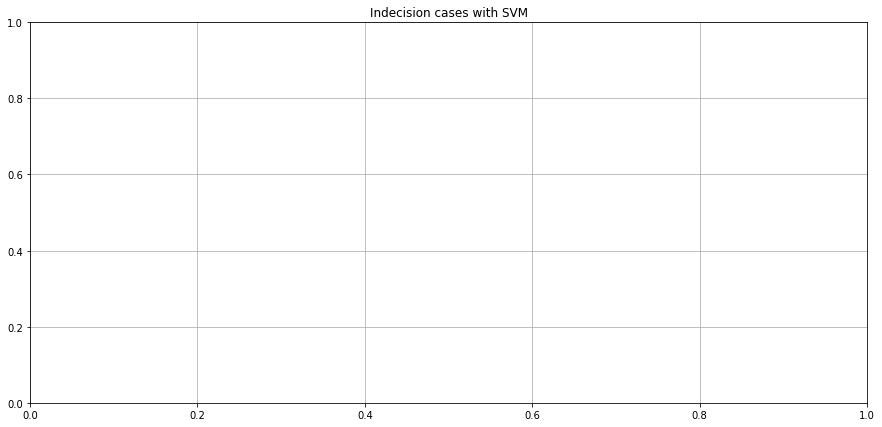

In [531]:
plot_hist([x[0] for x in SVM_predictions])

plt.title("Indecision cases with SVM")
plt.show()

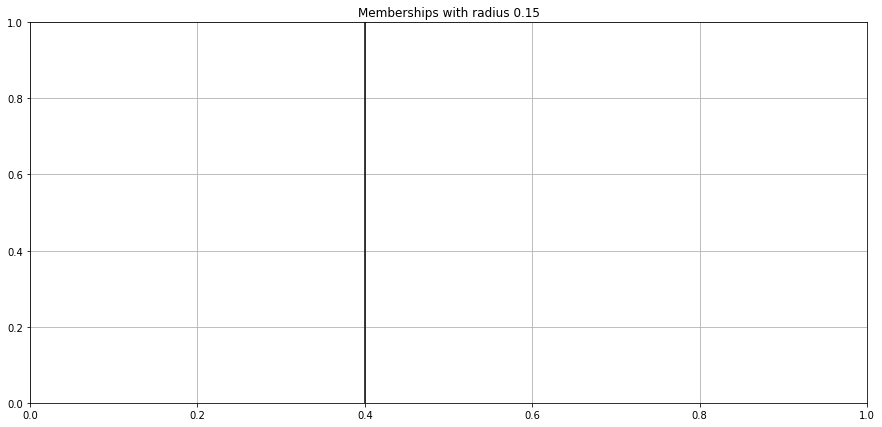

In [532]:
plt.figure(figsize=(15, 7))
weights = np.ones_like([x[1] for x in interval])/float(len([x[1] for x in interval]))
_, bins, patches = plt.hist([x[1] for x in interval], 10, color = "r", weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)

cm = plt.cm.get_cmap("seismic")

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cm(c))
    
plt.grid()
radius = 0.15
plt.title("Memberships with radius " + str(radius))
plt.axvline(x=0.4, color = "k")
plt.show()

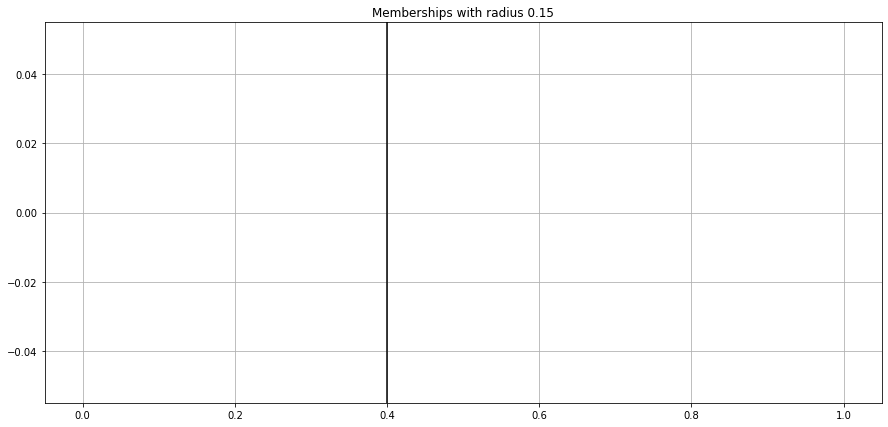

In [533]:
plt.figure(figsize=(15, 7))
_, bins, patches = plt.hist([x[1] for x in interval], 10, color = "r")

cm = plt.cm.get_cmap("seismic")

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cm(c))
    
plt.grid()
radius = 0.15
plt.title("Memberships with radius " + str(radius))
plt.axvline(x=0.4, color = "k")
plt.show()

In [534]:
experiment_tree = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in tree_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_tree = experiment_tree.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_tree = experiment_tree.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_tree = experiment_tree.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_tree = experiment_tree.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership


In [535]:
experiment_NN = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in NN_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_NN = experiment_NN.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_NN = experiment_NN.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_NN = experiment_NN.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_NN = experiment_NN.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership


In [536]:
experiment_SVM = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in SVM_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership


In [537]:
TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in tree_predictions])
confusion_tree = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_tree = precision(TP, FP)
recall_tree = recall(TP, FN)
f1_tree = f_one(precision_tree, recall_tree)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in NN_predictions])
confusion_NN = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_NN = precision(TP, FP)
recall_NN = recall(TP, FN)
f1_NN = f_one(precision_NN, recall_NN)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in SVM_predictions])
confusion_SVM = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_SVM = precision(TP, FP)
recall_SVM = recall(TP, FN)
f1_SVM = f_one(precision_SVM, recall_SVM)

In [538]:
pd.DataFrame([[precision_tree, recall_tree, f1_tree],
              [precision_NN, recall_NN, f1_NN], 
              [precision_SVM, recall_SVM, f1_SVM]],
              index=["tree classifier", "neural network", "svm"], 
              columns=["precision", "recall", "f1"])

,precision,recall,f1
tree classifier,0.0,0.0,0.0
neural network,0.0,0.0,0.0
svm,0.0,0.0,0.0


In [539]:
PATH_TEXTS = "datasets/profner/Fake.csv"
data_fake = pd.read_csv(PATH_TEXTS)

PATH_TEXTS = "datasets/profner/True.csv"
data_true = pd.read_csv(PATH_TEXTS)

In [540]:
def retrieve_text(data):
    for i in data_interval.iterrows():
        index = i[1]["index"]
        text = i[1]["text"]
        label = i[1]["label"]

        if label == 1:
            corpus = data_fake.iloc[index]["text"]
            print("News number " + str(index) + " is fake")
        else:
            corpus = data_true.iloc[index]["text"]
            print("News number " + str(index) + " is true")

        print(corpus) 
        print("")

In [541]:
retrieve_text(data_interval)  

In [564]:
models.best_models[0].predict(models.folds['x train 0'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [565]:
models.folds['y train 0']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [573]:
for i in range(0,5):
    TP, FP, FN, TN = my_confusion_matrix(models.folds['y test '+str(i)], models.best_models[i].predict(models.folds['x test '+str(i)]))
    print(precision(TP, FP), recall(TP, FN))

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [572]:
for i in range(0,5):
    TP, FP, FN, TN = my_confusion_matrix(models.folds['y test '+str(i)], models.all_labels[i])
    print(precision(TP, FP), recall(TP, FN))

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


In [570]:
models.all_memberships

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.,